In [1]:
import tensorflow as tf
import numpy as np

/home/koki/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tensorflow.reshapeとndarray.reshapeを使って(2,10,3)型のテンソルを(2,5,2,3)型のテンソルに変形する

In [2]:
array = np.arange(60).reshape((-1, 10, 3))
array

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]],

       [[30, 31, 32],
        [33, 34, 35],
        [36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47],
        [48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59]]])

# ndarray.reshapeでテンソルを変形

In [3]:
np_reshape_array = array.reshape(-1, 5, 2, 3)

# tensorflow.reshapeでテンソルを変形

In [4]:
tf.reset_default_graph()

In [5]:
X = tf.placeholder(tf.float32, shape=(None, 10, 3))
reshape_X = tf.reshape(X, shape=(-1, 5, 2, 3))
init = tf.global_variables_initializer()

In [6]:
with tf.Session() as sess:
    init.run()
    tf_reshape_X = reshape_X.eval(feed_dict={X: array})

tensorflow.reshapeの結果

In [7]:
print(tf_reshape_X)

[[[[ 0.  1.  2.]
   [ 3.  4.  5.]]

  [[ 6.  7.  8.]
   [ 9. 10. 11.]]

  [[12. 13. 14.]
   [15. 16. 17.]]

  [[18. 19. 20.]
   [21. 22. 23.]]

  [[24. 25. 26.]
   [27. 28. 29.]]]


 [[[30. 31. 32.]
   [33. 34. 35.]]

  [[36. 37. 38.]
   [39. 40. 41.]]

  [[42. 43. 44.]
   [45. 46. 47.]]

  [[48. 49. 50.]
   [51. 52. 53.]]

  [[54. 55. 56.]
   [57. 58. 59.]]]]


ndarray.reshapeの結果

In [8]:
print(np_reshape_array)

[[[[ 0  1  2]
   [ 3  4  5]]

  [[ 6  7  8]
   [ 9 10 11]]

  [[12 13 14]
   [15 16 17]]

  [[18 19 20]
   [21 22 23]]

  [[24 25 26]
   [27 28 29]]]


 [[[30 31 32]
   [33 34 35]]

  [[36 37 38]
   [39 40 41]]

  [[42 43 44]
   [45 46 47]]

  [[48 49 50]
   [51 52 53]]

  [[54 55 56]
   [57 58 59]]]]


たぶん結果は同じ

# 画像の取り込みとテンソルについて  
もやってみる

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
image = Image.open('lena.jpg')
image_array = np.asarray(image)

In [18]:
image_array.shape

(520, 520, 3)

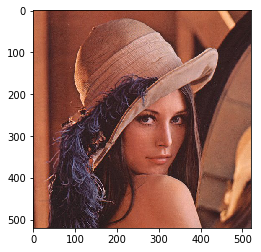

In [19]:
plt.imshow(image_array)
plt.show()

このことからわかることは,行数V列数UチャンネルKのときに  
(V,U,K)型のテンソルになっていて,任意のデータ数Nが追加されると(N,V,U,K)型のテンソルになる